<a href="https://colab.research.google.com/github/jthagar/Jay_INFO3020_Spring2020/blob/master/assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#assignment 11.1, with question 1, 2, 3 & 4


import pandas as pd
import pymysql as psql
##################################### Parts 1 and 2
## I used MySql Workbench to crete the table
schema = psql.connect("localhost","root","password","PyDB") #schema
cursor = schema.cursor() #cursor

data = read_csv("assign11-1-ch02-data.csv") #data from csv

##### getting data from the csv
data_list = []
for entry in data.itertuples():
    index = (entry[1],entry[2])
    data_list.append(index)
#####
#### Inserting the data into the sql table
sql="insert into ch_02 (dates,numbers) values(%s,%s)"
cursor.executemany(sql, data_list)
schema.commit()
print(cursor.rowcount, "were inserted") #check for completion
######################################
# print(data_list)



102894 were inserted
[('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24', 323), ('2013/1/25', 233), ('2013/1/26', 433), ('2013/1/27', 555), ('2013/1/28', 123), ('2013/1/29', 0), ('2013/1/30', 221), ('2013/1/24'

In [0]:
# Q.11.1 part 3 and 4
import pandas
import pymysql as psql


schema = psql.connect("localhost","root","password","PyDB") #schema
cursor = schema.cursor() #cursor

sql = "select dates, SUM(numbers) from ch_02 group by dates"
cursor.execute(sql)
sums = cursor.fetchall()
#turn the tuple of tuples into a dataframe
sums_db = pandas.DataFrame(data = sums, columns = ["dates","numbers"])
# Becuse of the sheer amount of rows, the sums are large.
# I created the table without unique column values, because
# the assignment did not specify whether they were unique or not

print(sums_db) #show output of the DataFrame execution

sums_db.to_csv("ch_02_sums.csv") #send dataframe into a file


       dates  numbers
0 2013-01-24  4748100
1 2013-01-25  3425100
2 2013-01-26  6365100
3 2013-01-27  8158500
4 2013-01-28  1808100
5 2013-01-29        0
6 2013-01-30  3247374


In [0]:
#Q11.1 Question 2
import pandas

#example input: best_selling_day("catering.csv","1-1-2011")
def best_selling_day(table_path, day):
    db = pandas.read_excel(table_path)
    db.convert_dtypes()
    db.set_index('sale date', inplace=True) #set date-time sale date as index
    
    date_day = pandas.to_datetime(day,format='%Y-%m-%d')
    date_day = date_day.date() #get correct format for date input
    
    for entry in db.itertuples(): #iterate through databse to find match
        if entry[0] == date_day:
            maxi = 0
            index = 0
            for num in range(1,len(entry)):
                if entry[num] > maxi: 
                    maxi = entry[num]
                    index = num
            print(str(date_day)+":",str(db.columns[index])+",",maxi)
            break # stop iterating if found to save time

# datetime example = 2015-1-5
day = input("please input a date-time to find best-selling item: ")
best_selling_day("assign11-1-catering_sale_all.xls",day)

please input a date-time to find best-selling item: 2015-1-21
2015-01-21: ribs, 15


please input a continent: Europe


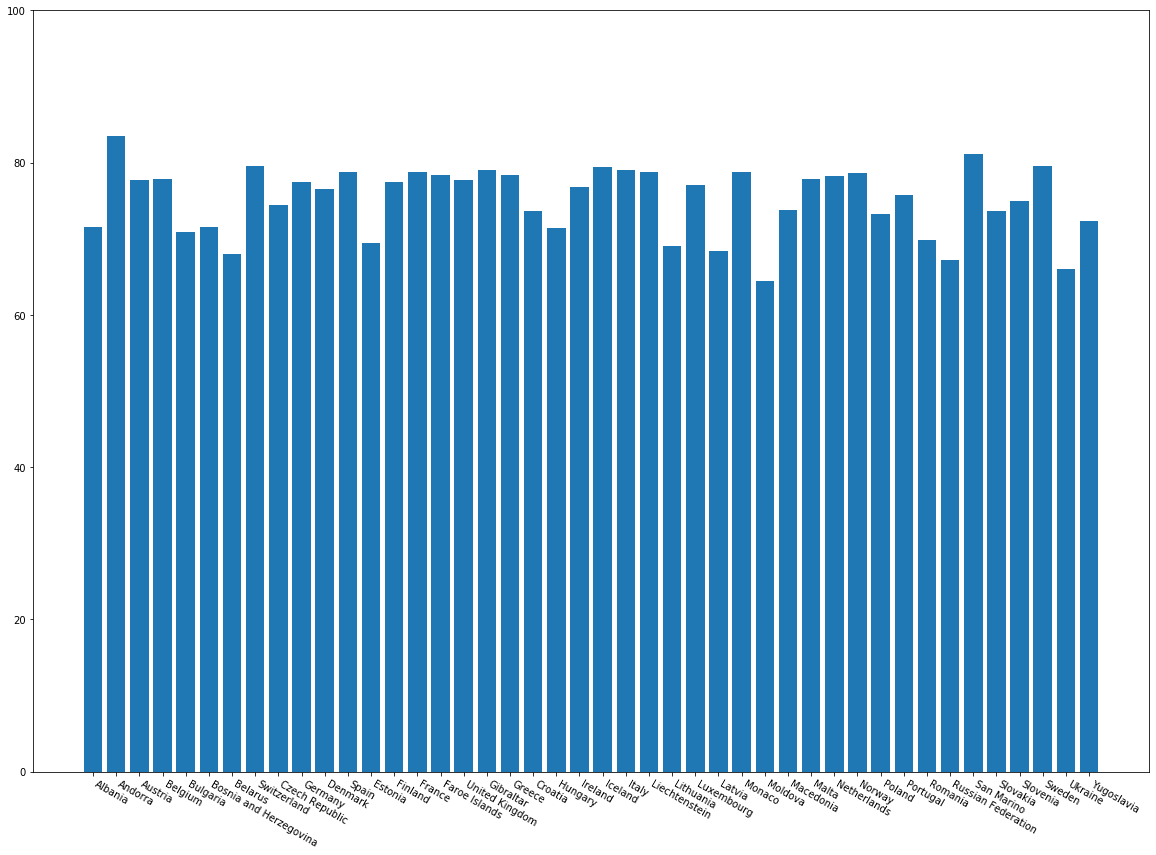

In [0]:
#Q.11.2 Question 3
import matplotlib.pyplot as mplot
import pymysql as psql

db = psql.connect("localhost","root","password","world")
cursor = db.cursor()

string = input("please input a continent: ")
sql = "select Name,LifeExpectancy from country where Continent = %s"
cursor.execute(sql,string)
countries = cursor.fetchall()

exp = []
country = []

for index in range(len(countries)):
    if(type(countries[index][1]) == type(None)):
        continue #cut out countries that do not have a value for life-exp
    else:
        exp.append(countries[index][1])   
        country.append(countries[index][0])

fig = mplot.gcf()
mplot.ylim(0,100)# set limits of y-axis
mplot.bar(country,exp) # set the x-axis names and y-axis values
mplot.xticks(rotation=-30, ha='left') # set x-axis tick rotation and placement
fig.set_size_inches(20, 14, forward = True) #increase size of graph for easier viewing
# fig.savefig('life_exp_continent.png', dpi=100) #saves a file in directory for .png
mplot.show()


please input a food to chart: ribs
ribs


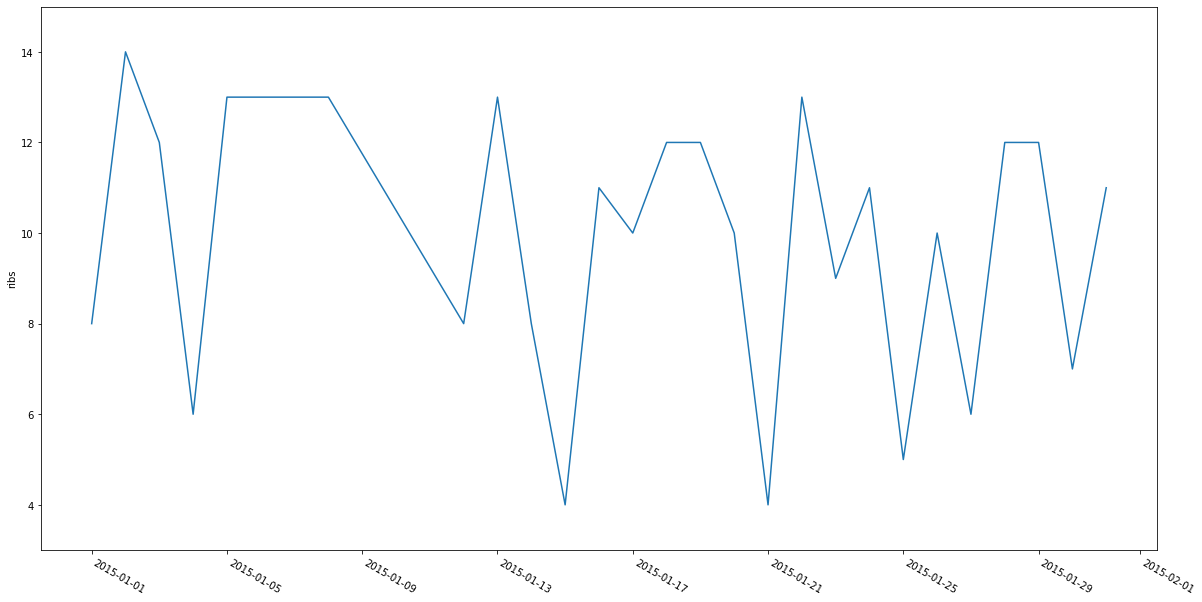

In [0]:
#Q11.2 Question 4

import pandas
import matplotlib.pyplot as mplot

dat_food = pandas.read_excel("assign11-1-catering_sale_all.xls")

dat_food.convert_dtypes()
dat_food.set_index('sale date', inplace=True) #set date-time sale date as index
    
indexes = dat_food.index
cols = dat_food.columns

food_type = input("please input a food to chart: ")

length = 0
for l in range(len(cols)):
    if(food_type == cols[l]):
        print(cols[l])
        length = l
        break

vals = []
for item in range(len(indexes)):
    vals.append(dat_food.iat[item, length])

fig = mplot.gcf()
mplot.ylim(min(vals)-1,max(vals)+1)# set limits of y-axis
mplot.ylabel(food_type)
mplot.plot(indexes,vals) # set the x-axis names and y-axis values
mplot.xticks(rotation=-30, ha='left') # set x-axis tick rotation and placement
fig.set_size_inches(20, 10, forward = True) #increase size of graph for easier viewing
# fig.savefig('life_exp_continent.png', dpi=100) #saves a file in directory for .png
mplot.show()